In [50]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('coolwarm')

In [2]:
X = np.genfromtxt('../data/ts_file.dat',skip_header=1).T

<ErrorbarContainer object of 3 artists>

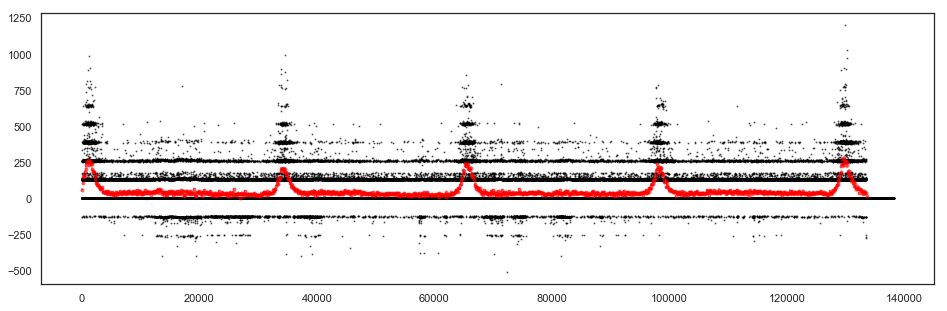

In [3]:
t,y,s=X
t -= t[0]
bins = np.r_[t.min()+50:t.max()+50:100]
ybins = np.zeros_like(bins)
indices = np.digitize(t,bins)
y[~np.isfinite(y)] = 0.0
for i in range(len(bins)):
    c = (indices == i)
    ybins[i] = y[c].sum()
l = ybins > 0
tbin = bins[l]
ybin = ybins[l]
sbin = np.sqrt(ybin)
plt.figure(figsize=(16,5))
plt.plot(t,y*100,'k.',ms=2,alpha=0.5)
plt.errorbar(tbin,ybin,yerr=sbin,fmt='r.',alpha=0.5)

Initial period: 32000.0 sec


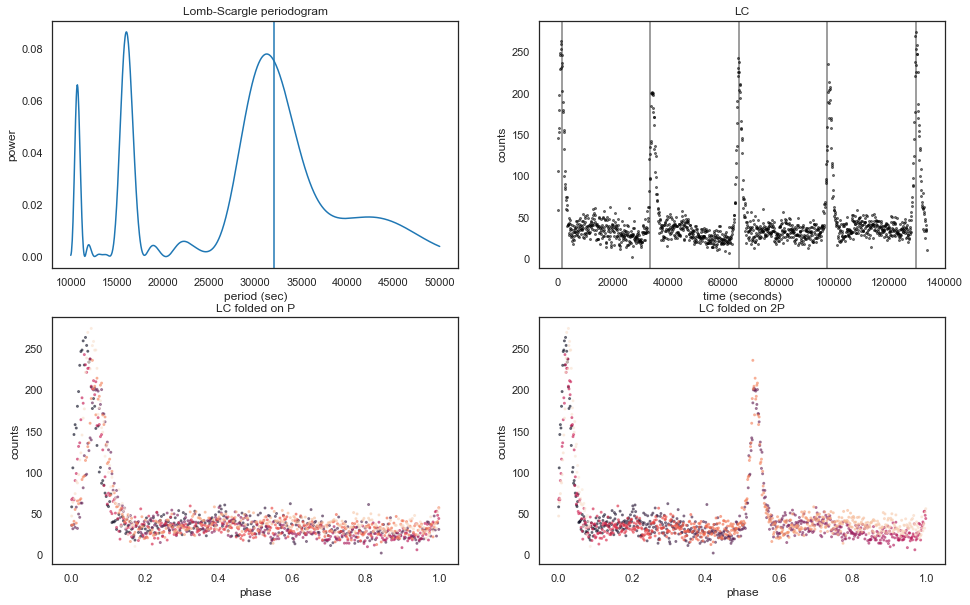

In [23]:
from astropy.stats import LombScargle
def explore_period(t,y,e):
    # First do LS periodogram to get initial period estimate
    periods = np.linspace(50000,10000,1000)
    power = LombScargle(t, y, dy = e).power(1./periods)
    per_init = periods[np.argmax(power)]
    per_init = 32000
    fig, axes = plt.subplots(2,2,figsize=(16,10))
    axes[0,0].plot(periods,power)
    axes[0,0].axvline(per_init)
    axes[0,0].set_title('Lomb-Scargle periodogram')
    axes[0,0].set_xlabel('period (sec)')
    axes[0,0].set_ylabel('power')
    print('Initial period: {:.1f} sec'.format(per_init))
    # Now fold LC on initial period estimate and locate peak
    axes[0,1].plot(t,y,'k.',ms=4,alpha=0.5)
    t0 = 0.05 * per_init
    while t0 < t.max():
        axes[0,1].axvline(t0,c='k',alpha=0.5)
        t0 += per_init
    axes[0,1].set_title('LC')
    axes[0,1].set_xlabel('time (seconds)')
    axes[0,1].set_ylabel('counts')
    phase = (t % per_init) / per_init
    axes[1,0].scatter(phase,y,c=t,s=4,alpha=0.5)
    axes[1,0].set_title('LC folded on P')
    axes[1,0].set_xlabel('phase')
    axes[1,0].set_ylabel('counts')
    per_init *= 2
    phase = (t % per_init) / per_init
    axes[1,1].scatter(phase,y,c=t,s=4,alpha=0.5)
    axes[1,1].set_title('LC folded on 2P')
    axes[1,1].set_xlabel('phase')
    axes[1,1].set_ylabel('counts')
explore_period(tbin,ybin,sbin)

[ 6.40000000e+04  4.84512006e+01  4.60517019e+00 -1.38629436e+00
  1.24292162e+01  2.00000000e-02 -9.21034037e+00  1.24292162e+01
  5.40000000e-01 -9.21034037e+00]
[ 6.40000000e+04  4.84512006e+01  4.60517019e+00 -1.38629436e+00
  1.24292162e+01  2.00000000e-02 -9.21034037e+00  1.24292162e+01
  5.40000000e-01 -9.21034037e+00]
[ 6.40000000e+04  4.84512006e+01  4.60517019e+00 -1.38629436e+00
  1.24292162e+01  2.00000000e-02 -9.21034037e+00  1.24292162e+01
  5.40000000e-01 -9.21034037e+00]
[ 6.40000000e+04  4.84512006e+01  4.60517020e+00 -1.38629436e+00
  1.24292162e+01  2.00000000e-02 -9.21034037e+00  1.24292162e+01
  5.40000000e-01 -9.21034037e+00]
[ 6.40000000e+04  4.84512006e+01  4.60517019e+00 -1.38629435e+00
  1.24292162e+01  2.00000000e-02 -9.21034037e+00  1.24292162e+01
  5.40000000e-01 -9.21034037e+00]
[ 6.40000000e+04  4.84512006e+01  4.60517019e+00 -1.38629436e+00
  1.24292162e+01  2.00000000e-02 -9.21034037e+00  1.24292162e+01
  5.40000000e-01 -9.21034037e+00]
[ 6.40000000e+04

[ 6.40000000e+04  4.84512006e+01  4.60517179e+00 -1.38630138e+00
  1.24292162e+01  3.65486601e-02 -9.21028062e+00  1.24292162e+01
  5.33300624e-01 -9.21028879e+00]
[ 6.40000000e+04  4.84512006e+01  4.60517179e+00 -1.38630138e+00
  1.24292162e+01  3.65486601e-02 -9.21028062e+00  1.24292162e+01
  5.33300624e-01 -9.21028879e+00]
[ 6.40000000e+04  4.84512006e+01  4.60517180e+00 -1.38630138e+00
  1.24292162e+01  3.65486601e-02 -9.21028062e+00  1.24292162e+01
  5.33300624e-01 -9.21028879e+00]
[ 6.40000000e+04  4.84512006e+01  4.60517179e+00 -1.38630136e+00
  1.24292162e+01  3.65486601e-02 -9.21028062e+00  1.24292162e+01
  5.33300624e-01 -9.21028879e+00]
[ 6.40000000e+04  4.84512006e+01  4.60517179e+00 -1.38630138e+00
  1.24292162e+01  3.65486601e-02 -9.21028062e+00  1.24292162e+01
  5.33300624e-01 -9.21028879e+00]
[ 6.40000000e+04  4.84512006e+01  4.60517179e+00 -1.38630138e+00
  1.24292162e+01  3.65486750e-02 -9.21028062e+00  1.24292162e+01
  5.33300624e-01 -9.21028879e+00]
[ 6.40000000e+04

[ 6.40000001e+04  4.84511945e+01  4.60627547e+00 -1.39111123e+00
  1.24291907e+01  2.46553401e-02 -9.14772622e+00  1.24291890e+01
  5.35951730e-01 -9.17345540e+00]
[ 6.40000001e+04  4.84511945e+01  4.60627547e+00 -1.39111123e+00
  1.24291907e+01  2.46553550e-02 -9.14772622e+00  1.24291890e+01
  5.35951730e-01 -9.17345540e+00]
[ 6.40000001e+04  4.84511945e+01  4.60627547e+00 -1.39111123e+00
  1.24291907e+01  2.46553401e-02 -9.14772621e+00  1.24291890e+01
  5.35951730e-01 -9.17345540e+00]
[ 6.40000001e+04  4.84511945e+01  4.60627547e+00 -1.39111123e+00
  1.24291907e+01  2.46553401e-02 -9.14772622e+00  1.24291890e+01
  5.35951730e-01 -9.17345540e+00]
[ 6.40000001e+04  4.84511945e+01  4.60627547e+00 -1.39111123e+00
  1.24291907e+01  2.46553401e-02 -9.14772622e+00  1.24291890e+01
  5.35951745e-01 -9.17345540e+00]
[ 6.40000001e+04  4.84511945e+01  4.60627547e+00 -1.39111123e+00
  1.24291907e+01  2.46553401e-02 -9.14772622e+00  1.24291890e+01
  5.35951730e-01 -9.17345539e+00]
[ 6.40000005e+04

[ 6.40000163e+04  4.84520058e+01  4.85818807e+00 -2.44819772e+00
  1.24251756e+01  2.48952905e-02 -8.98242689e+00  1.24248676e+01
  5.36087735e-01 -8.65432645e+00]
[ 6.40000163e+04  4.84520058e+01  4.85818807e+00 -2.44819772e+00
  1.24251756e+01  2.48952905e-02 -8.98242690e+00  1.24248676e+01
  5.36087735e-01 -8.65432645e+00]
[ 6.40000163e+04  4.84520058e+01  4.85818807e+00 -2.44819772e+00
  1.24251756e+01  2.48952905e-02 -8.98242690e+00  1.24248676e+01
  5.36087750e-01 -8.65432645e+00]
[ 6.40000163e+04  4.84520058e+01  4.85818807e+00 -2.44819772e+00
  1.24251756e+01  2.48952905e-02 -8.98242690e+00  1.24248676e+01
  5.36087735e-01 -8.65432644e+00]
[ 6.40009497e+04  4.82526065e+01  5.95939336e+00 -2.71581822e+00
  1.21960898e+01  2.52515466e-02 -8.70356056e+00  1.21791529e+01
  5.36220815e-01 -8.55567250e+00]
[ 6.40009497e+04  4.82526065e+01  5.95939336e+00 -2.71581822e+00
  1.21960898e+01  2.52515466e-02 -8.70356056e+00  1.21791529e+01
  5.36220815e-01 -8.55567250e+00]
[ 6.40009497e+04

[ 6.40064126e+04  4.73288660e+01  6.57975668e+00 -2.94823788e+00
  1.10200182e+01  2.53796709e-02 -8.56540706e+00  1.08641598e+01
  5.36253135e-01 -8.51449718e+00]
[ 6.40064126e+04  4.73288660e+01  6.57975668e+00 -2.94823788e+00
  1.10200182e+01  2.53796709e-02 -8.56540706e+00  1.08641598e+01
  5.36253120e-01 -8.51449716e+00]
[ 6.40097662e+04  4.69012254e+01  5.78354730e+00 -3.22511970e+00
  1.05332941e+01  2.53286114e-02 -8.56761268e+00  1.02512035e+01
  5.36204153e-01 -8.52418566e+00]
[ 6.40097662e+04  4.69012254e+01  5.78354730e+00 -3.22511970e+00
  1.05332941e+01  2.53286114e-02 -8.56761268e+00  1.02512035e+01
  5.36204153e-01 -8.52418566e+00]
[ 6.40097662e+04  4.69012254e+01  5.78354730e+00 -3.22511970e+00
  1.05332941e+01  2.53286114e-02 -8.56761268e+00  1.02512035e+01
  5.36204153e-01 -8.52418566e+00]
[ 6.40097662e+04  4.69012254e+01  5.78354730e+00 -3.22511970e+00
  1.05332941e+01  2.53286114e-02 -8.56761268e+00  1.02512035e+01
  5.36204153e-01 -8.52418566e+00]
[ 6.40097662e+04

[ 6.40748497e+04  3.55077634e+01  2.72860283e+00 -5.86089045e+00
  6.93096342e+00  2.43119392e-02 -8.54930524e+00  6.38672463e+00
  5.35223649e-01 -8.63164986e+00]
metric outside bounds
[ 6.40748497e+04  3.55077634e+01  2.72860283e+00 -5.86089045e+00
  6.93096342e+00  2.43119392e-02 -8.54930524e+00  6.38672463e+00
  5.35223649e-01 -8.63164986e+00]
metric outside bounds
[ 6.40748497e+04  3.55077634e+01  2.72860283e+00 -5.86089045e+00
  6.93096342e+00  2.43119392e-02 -8.54930524e+00  6.38672463e+00
  5.35223649e-01 -8.63164986e+00]
metric outside bounds
[ 6.40748497e+04  3.55077635e+01  2.72860283e+00 -5.86089045e+00
  6.93096342e+00  2.43119392e-02 -8.54930524e+00  6.38672463e+00
  5.35223649e-01 -8.63164986e+00]
metric outside bounds
[ 6.40748497e+04  3.55077634e+01  2.72860285e+00 -5.86089045e+00
  6.93096342e+00  2.43119392e-02 -8.54930524e+00  6.38672463e+00
  5.35223649e-01 -8.63164986e+00]
metric outside bounds
[ 6.40748497e+04  3.55077634e+01  2.72860283e+00 -5.86089043e+00
  6.9

[ 6.40474676e+04  4.05885626e+01  2.90495061e+00 -4.99795125e+00
  7.99613609e+00  2.47342085e-02 -8.55878694e+00  7.19638165e+00
  5.35615311e-01 -8.58148687e+00]
[ 6.40474676e+04  4.05885626e+01  2.90495059e+00 -4.99795124e+00
  7.99613609e+00  2.47342085e-02 -8.55878694e+00  7.19638165e+00
  5.35615311e-01 -8.58148687e+00]
[ 6.40474676e+04  4.05885626e+01  2.90495059e+00 -4.99795125e+00
  7.99613611e+00  2.47342085e-02 -8.55878694e+00  7.19638165e+00
  5.35615311e-01 -8.58148687e+00]
[ 6.40474676e+04  4.05885626e+01  2.90495059e+00 -4.99795125e+00
  7.99613609e+00  2.47342234e-02 -8.55878694e+00  7.19638165e+00
  5.35615311e-01 -8.58148687e+00]
[ 6.40474676e+04  4.05885626e+01  2.90495059e+00 -4.99795125e+00
  7.99613609e+00  2.47342085e-02 -8.55878693e+00  7.19638165e+00
  5.35615311e-01 -8.58148687e+00]
[ 6.40474676e+04  4.05885626e+01  2.90495059e+00 -4.99795125e+00
  7.99613609e+00  2.47342085e-02 -8.55878694e+00  7.19638166e+00
  5.35615311e-01 -8.58148687e+00]
[ 6.40474676e+04

AttributeError: 'numpy.ndarray' object has no attribute 'todense'

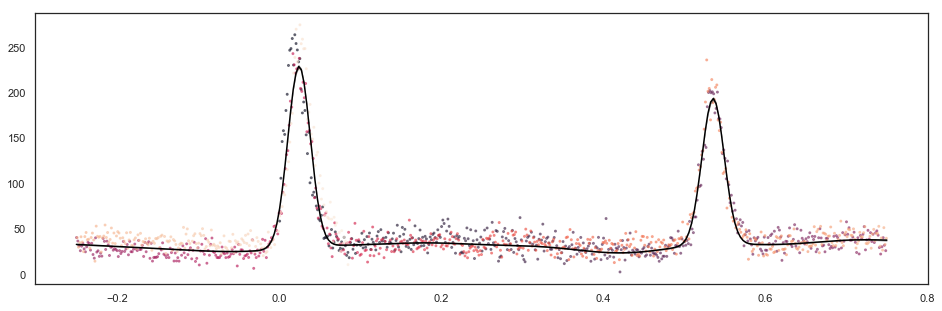

In [56]:
from george import kernels, GP
from scipy.optimize import minimize
def fit_GP(t,y,e):
    P, A, T1, sig, dT2, amp, lam = [32000.0*2,500.0,0.02,0.01,0.04,10.0,0.5]
    k0 = amp**2 * kernels.ExpSquaredKernel(lam**2)
    k1 = A**2 * kernels.LocalGaussianKernel(location=T1,log_width=np.log(sig**2))
    k2 = A**2 * kernels.LocalGaussianKernel(location=0.5 + dT2,log_width=np.log(sig**2))
    gp = GP(k0+k1+k2,mean=y.mean(),fit_mean=True)
    def nll_GP(p):
        print(p)
        P = p[0]
        if P<62000 or P>66000:
            print('period outside bounds')
            return 1e25
        if p[3] < -5: 
            print('metric outside bounds')
            return 1e25
        phase = (t % P) / P
        phase[phase>0.75] -= 1
        gp.set_parameter_vector(p[1:])
        try:
            gp.compute(phase,yerr=e)
        except:
            return 1e25
        return - gp.log_likelihood(y)
    p_init = np.append(P,gp.get_parameter_vector())
    soln = minimize(nll_GP,p_init)
    p_fit = soln.x
#    p_fit = p_init
    P = p_fit[0]
    phase = (t % P) / P
    phase[phase>0.75] -= 1
    gp.set_parameter_vector(p_fit[1:])
    gp.compute(phase,yerr=e)
    ps = np.linspace(-0.25,0.75,300)
    mu,var = gp.predict(y,ps,return_var=True)
    std = np.sqrt(var)
    plt.figure(figsize=(16,5))
    plt.scatter(phase,y,c=t,s=4,alpha=0.5)
    plt.plot(ps,mu,'k-')
    plt.fill_between(ps,mu+std,mu-std,color='k',alpha=0.4,lw=0)
    names = np.append('period',gp.get_parameter_names())
    ftol = 2.220446049250313e-09
    inv_hess = np.diag(soln.hess_inv.todense())
    print('Final parameters')
    for i,name in enumerate(names):
        uncertainty_i = np.sqrt(max(1, abs(soln.fun))*ftol*inv_hess[i])
        print('{0:s}: {1:12.4e} +/- {2:.1e}'.format(name,p_fit[i], uncertainty_i))
    return p_fit
p_fit = fit_GP(tbin,ybin,sbin)

In [49]:
P, A, T1, sig, dT2, amp, lam = [32000.0*2,500.0,0.02,0.01,0.04,10.0,0.5]
k0 = amp**2 * kernels.ExpSquaredKernel(lam**2)
k1 = A**2 * kernels.LocalGaussianKernel(location=T1,log_width=np.log(sig**2))
k2 = A**2 * kernels.LocalGaussianKernel(location=0.5 + dT2,log_width=np.log(sig**2))
gp = GP(k0+k1+k2,mean=y.mean(),fit_mean=True)

    ftol = 2.220446049250313e-09
    tmp_i = np.zeros(len(res.x))
    for i in range(6):
    tmp_i[i] = 1.0
    uncertainty_i = np.sqrt(max(1, abs(res.fun))*ftol*res.hess_inv(tmp_i)[i])
    tmp_i[i] = 0.0
    print(name,p_fit[i])


period 64047.36017007293
mean:value 40.60848734267252
kernel:k1:k1:k1:log_constant 2.90564215306759
kernel:k1:k1:k2:metric:log_M_0_0 -4.994567178969808
kernel:k1:k2:k1:log_constant 8.000313242314299
kernel:k1:k2:k2:location 0.02473586443889143
kernel:k1:k2:k2:log_width -8.55882412543735
kernel:k2:k1:log_constant 7.199556770784164
kernel:k2:k2:location 0.535616847161196
kernel:k2:k2:log_width -8.58129015459203


In [55]:
print(np.sqrt(np.exp(p_fit[-1]))*p_fit[0])

877.1982434021662


In [57]:
print(np.sqrt(np.exp(p_fit[-4]))*p_fit[0])

887.107374570145
